In [36]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats

import pymannkendall as mk

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import pandas as pd


## check the LoP

In [37]:
def model_LOPS2(run,yr,m, d = 0, save = False):
    ds = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/{run}/ORCA2_1m_{yr}0101_{yr}1231_LoP_T.nc')

    lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6_din_', 'lim8_light_']
    pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

    plt.figure()


    fact = 1.5
    fig, axs = plt.subplots(5,6, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6din_', 'lim8light_']
    pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

    ind = 0
    for l in lop:
        for p in pft:

            if ((l == 'lim5si_') & (p != 'dia')):
                axs[ind].set_xticks([])
                axs[ind].set_yticks([])
                pass
                # ind = ind+i
                # print(ind)

            else:
                tvar = (f'{l}{p}')
                im = axs[ind].pcolormesh(ds[tvar][m-1,d,:,:], vmin = 0, vmax = 1)
                axs[ind].set_title(f'{tvar}')
                axs[ind].set_xticks([])
                axs[ind].set_yticks([])
            ind = ind+1


    cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.04, pad=0.02)
    plt.suptitle(f'{run} year {yr} month {m} depth {d} model-output lim values')
    if save:
        fig.savefig(f'./plts/raw_lop_output_{run}_{yr}_m{m}_d{d}.jpg')

<Figure size 432x288 with 0 Axes>

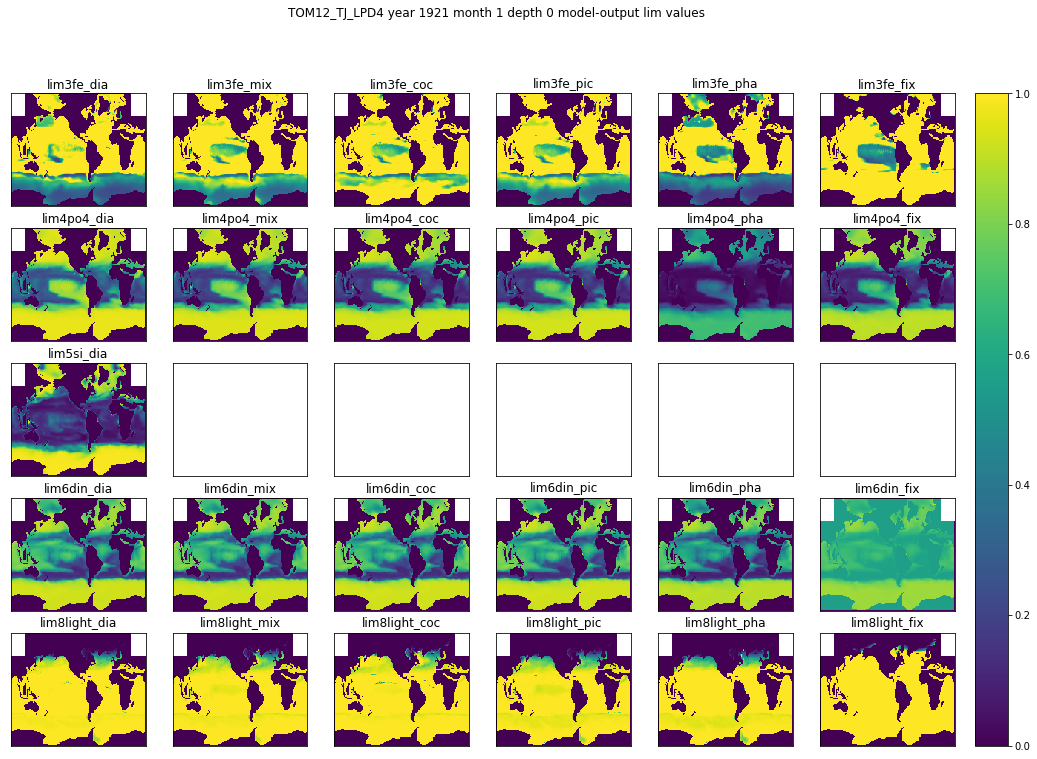

In [38]:
model_LOPS2('TOM12_TJ_LPD4',1921,1,0, save = True)

In [39]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_LPD4/ORCA2_1m_19200101_19201231_LoP_T.nc')